# CEO LSTM - Music Generation

TODO:
- add time sig events
- add different section objects with rules
- finish song generator using section objects

# Download dependencies

In [1]:
!apt-get update
!apt-get install sudo
!sudo apt install -y fluidsynth

!pip install --upgrade pip
!pip install --upgrade pyfluidsynth
!pip install pretty_midi
!pip install music21
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install matplotlib -qq
!pip install seaborn -qq

import os
import shutil
import copy
import tensorflow as tf
import numpy as np
import glob
import datetime
import pathlib
import pandas as pd
from IPython import display
from IPython import core
import pretty_midi
import collections
b
import music21
from music21 import *
from pretty_midi import PrettyMIDI
from fractions import Fraction
import math
import seaborn as sns
sns.set()
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

#is the reason to explicitely set this just so that tensorflow and numpy produce the same randoms?
tf.random.set_seed(42)
np.random.seed(42)

Get:1 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal/main amd64 Packages [1275 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [11.3 MB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2358 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [972 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [27.7 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1779 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [177 kB]
Get:13 http://archive.ubuntu.com/ubuntu foc

Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libsystemd0 amd64 245.4-4ubuntu3.19 [268 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libapparmor1 amd64 2.13.3-7ubuntu5.1 [34.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libcap2 amd64 1:2.32-1 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 libargon2-1 amd64 0~20171227-0.2 [19.2 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/main amd64 libdevmapper1.02.1 amd64 2:1.02.167-1ubuntu1 [127 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libjson-c4 amd64 0.13.1+dfsg-7ubuntu0.3 [29.3 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libcryptsetup12 amd64 2:2.2.2-3ubuntu2.4 [166 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal/main amd64 libip4tc2 amd64 1.8.4-3ubuntu2 [18.8 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libkmod2 amd64 27-1ubuntu2.1 [45.3 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/

Get:75 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5dbus5 amd64 5.12.8+dfsg-0ubuntu2.1 [208 kB]
Get:76 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libqt5network5 amd64 5.12.8+dfsg-0ubuntu2.1 [673 kB]
Get:77 http://archive.ubuntu.com/ubuntu focal/main amd64 libsm6 amd64 2:1.2.3-1 [16.1 kB]
Get:78 http://archive.ubuntu.com/ubuntu focal/main amd64 libxcb-icccm4 amd64 0.4.1-1.1 [10.8 kB]
Get:79 http://archive.ubuntu.com/ubuntu focal/main amd64 libxcb-util1 amd64 0.4.0-0ubuntu3 [11.2 kB]
Get:80 http://archive.ubuntu.com/ubuntu focal/main amd64 libxcb-image0 amd64 0.4.0-1build1 [12.3 kB]
Get:81 http://archive.ubuntu.com/ubuntu focal/main amd64 libxcb-keysyms1 amd64 0.4.0-1build1 [8452 B]
Get:82 http://archive.ubuntu.com/ubuntu focal/main amd64 libxcb-randr0 amd64 1.14-2 [16.3 kB]
Get:83 http://archive.ubuntu.com/ubuntu focal/main amd64 libxcb-render0 amd64 1.14-2 [14.8 kB]
Get:84 http://archive.ubuntu.com/ubuntu focal/main amd64 libxcb-render-util0 am

Get:151 http://archive.ubuntu.com/ubuntu focal/main amd64 libxss1 amd64 1:1.2.3-1 [8140 B]
Get:152 http://archive.ubuntu.com/ubuntu focal/universe amd64 libsdl2-2.0-0 amd64 2.0.10+dfsg1-3 [407 kB]
Get:153 http://archive.ubuntu.com/ubuntu focal/universe amd64 timgm6mb-soundfont all 1.3-3 [5420 kB]
Get:154 http://archive.ubuntu.com/ubuntu focal/universe amd64 libfluidsynth2 amd64 2.1.1-2 [198 kB]
Get:155 http://archive.ubuntu.com/ubuntu focal/universe amd64 fluidsynth amd64 2.1.1-2 [25.6 kB]
Get:156 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libproxy1v5 amd64 0.4.15-10ubuntu1.2 [49.1 kB]
Get:157 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 glib-networking-common all 2.64.2-1ubuntu0.1 [5040 B]
Get:158 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 glib-networking-services amd64 2.64.2-1ubuntu0.1 [10.6 kB]
Get:159 http://archive.ubuntu.com/ubuntu focal/main amd64 gsettings-desktop-schemas all 3.36.0-1ubuntu1 [29.0 kB]
Get:160 http://archive.ubuntu.com

ln: failed to create symbolic link '/etc/resolv.conf': Device or resource busy
Created symlink /etc/systemd/system/multi-user.target.wants/ondemand.service → /lib/systemd/system/ondemand.service.
Created symlink /etc/systemd/system/sysinit.target.wants/systemd-pstore.service → /lib/systemd/system/systemd-pstore.service.
Initializing machine ID from random generator.
Selecting previously unselected package systemd-sysv.
(Reading database ... 41986 files and directories currently installed.)
Preparing to unpack .../000-systemd-sysv_245.4-4ubuntu3.19_amd64.deb ...
7Progress: [  6%] [###.......................................................] 8Unpacking systemd-sysv (245.4-4ubuntu3.19) ...
Selecting previously unselected package libdouble-conversion3:amd64.
Preparing to unpack .../001-libdouble-conversion3_3.1.5-4ubuntu1_amd64.deb ...
Unpacking libdouble-conversion3:amd64 (3.1.5-4ubuntu1) ...
Selecting previously unselected package libpcre2-16-0:amd64.
Preparing to unpack .../002-libpcre

Preparing to unpack .../038-libpciaccess0_0.16-0ubuntu1_amd64.deb ...
Unpacking libpciaccess0:amd64 (0.16-0ubuntu1) ...
Selecting previously unselected package libdrm-intel1:amd64.
Preparing to unpack .../039-libdrm-intel1_2.4.107-8ubuntu1~20.04.2_amd64.deb ...
Unpacking libdrm-intel1:amd64 (2.4.107-8ubuntu1~20.04.2) ...
Selecting previously unselected package libdrm-nouveau2:amd64.
Preparing to unpack .../040-libdrm-nouveau2_2.4.107-8ubuntu1~20.04.2_amd64.deb ...
Unpacking libdrm-nouveau2:amd64 (2.4.107-8ubuntu1~20.04.2) ...
Selecting previously unselected package libdrm-radeon1:amd64.
Preparing to unpack .../041-libdrm-radeon1_2.4.107-8ubuntu1~20.04.2_amd64.deb ...
7Progress: [ 17%] [#########.................................................] 8Unpacking libdrm-radeon1:amd64 (2.4.107-8ubuntu1~20.04.2) ...
Selecting previously unselected package libelf1:amd64.
Preparing to unpack .../042-libelf1_0.176-1.1build1_amd64.deb ...
Unpacking libelf1:amd64 (0.176-1.1build1) ...
Selecting pre

Selecting previously unselected package libxkbcommon0:amd64.
Preparing to unpack .../078-libxkbcommon0_0.10.0-1_amd64.deb ...
Unpacking libxkbcommon0:amd64 (0.10.0-1) ...
7Progress: [ 27%] [###############...........................................] 8Selecting previously unselected package libxkbcommon-x11-0:amd64.
Preparing to unpack .../079-libxkbcommon-x11-0_0.10.0-1_amd64.deb ...
Unpacking libxkbcommon-x11-0:amd64 (0.10.0-1) ...
Selecting previously unselected package libxrender1:amd64.
Preparing to unpack .../080-libxrender1_1%3a0.9.10-1_amd64.deb ...
Unpacking libxrender1:amd64 (1:0.9.10-1) ...
Selecting previously unselected package libqt5gui5:amd64.
Preparing to unpack .../081-libqt5gui5_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
Unpacking libqt5gui5:amd64 (5.12.8+dfsg-0ubuntu2.1) ...
Selecting previously unselected package libqt5widgets5:amd64.
Preparing to unpack .../082-libqt5widgets5_5.12.8+dfsg-0ubuntu2.1_amd64.deb ...
Unpacking libqt5widgets5:amd64 (5.12.8+dfsg-0ubuntu2.1) ..

Selecting previously unselected package libatspi2.0-0:amd64.
Preparing to unpack .../116-libatspi2.0-0_2.36.0-2_amd64.deb ...
7Progress: [ 37%] [#####################.....................................] 8Unpacking libatspi2.0-0:amd64 (2.36.0-2) ...
Selecting previously unselected package libxtst6:amd64.
Preparing to unpack .../117-libxtst6_2%3a1.2.3-1_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1) ...
Selecting previously unselected package at-spi2-core.
Preparing to unpack .../118-at-spi2-core_2.36.0-2_amd64.deb ...
Unpacking at-spi2-core (2.36.0-2) ...
Selecting previously unselected package dbus-user-session.
Preparing to unpack .../119-dbus-user-session_1.12.16-2ubuntu2.3_amd64.deb ...
Unpacking dbus-user-session (1.12.16-2ubuntu2.3) ...
7Progress: [ 38%] [######################....................................] 8Selecting previously unselected package libdconf1:amd64.
Preparing to unpack .../120-libdconf1_0.36.0-1_amd64.deb ...
Unpacking libdconf1:amd64 (0.36.0-1) ...

7Progress: [ 47%] [###########################...............................] 8Unpacking libavahi-client3:amd64 (0.7-4ubuntu7.1) ...
Selecting previously unselected package liblcms2-2:amd64.
Preparing to unpack .../155-liblcms2-2_2.9-4_amd64.deb ...
Unpacking liblcms2-2:amd64 (2.9-4) ...
Selecting previously unselected package libcolord2:amd64.
Preparing to unpack .../156-libcolord2_1.4.4-2_amd64.deb ...
Unpacking libcolord2:amd64 (1.4.4-2) ...
Selecting previously unselected package libcups2:amd64.
Preparing to unpack .../157-libcups2_2.3.1-9ubuntu1.2_amd64.deb ...
Unpacking libcups2:amd64 (2.3.1-9ubuntu1.2) ...
7Progress: [ 48%] [###########################...............................] 8Selecting previously unselected package libepoxy0:amd64.
Preparing to unpack .../158-libepoxy0_1.5.4-1_amd64.deb ...
Unpacking libepoxy0:amd64 (1.5.4-1) ...
Selecting previously unselected package libgdk-pixbuf2.0-bin.
Preparing to unpack .../159-libgdk-pixbuf2.0-bin_2.40.0+dfsg-3ubuntu0.4_amd

Setting up libllvm12:amd64 (1:12.0.0-3ubuntu1~20.04.5) ...
Setting up libdbus-1-3:amd64 (1.12.16-2ubuntu2.3) ...
7Progress: [ 65%] [#####################################.....................] 8Setting up dbus (1.12.16-2ubuntu2.3) ...
Setting up libfribidi0:amd64 (1.0.8-2ubuntu0.1) ...
Setting up shared-mime-info (1.15-1) ...
Setting up libpng16-16:amd64 (1.6.37-2) ...
7Progress: [ 66%] [######################################....................] 8Setting up libwebp6:amd64 (0.6.1-2ubuntu0.20.04.1) ...
Setting up fonts-dejavu-core (2.37-1) ...
Setting up ucf (3.0038+nmu1) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76.)
debconf: falling back to frontend: Readline
7Progress: [ 67%] [######################################....................] 8Setting up libsensors5:amd64 (1:3.6.0-2ubuntu1.1) ...
Setting up libqt5core5a:amd64 (5

Setting up python3-gi (3.36.0-1) ...
7Progress: [ 90%] [####################################################......] 8Setting up libwacom-bin (1.3-2ubuntu3) ...
Setting up libcups2:amd64 (2.3.1-9ubuntu1.2) ...
Setting up at-spi2-core (2.36.0-2) ...
7Progress: [ 91%] [####################################################......] 8Setting up libegl1:amd64 (1.3.2-1~ubuntu0.20.04.2) ...
Setting up libcairo-gobject2:amd64 (1.16.0-4ubuntu1) ...
Setting up libpangoft2-1.0-0:amd64 (1.44.7-2ubuntu4) ...
Setting up libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...
7Progress: [ 92%] [#####################################################.....] 8Setting up libfluidsynth2:amd64 (2.1.1-2) ...
Setting up libpangocairo-1.0-0:amd64 (1.44.7-2ubuntu4) ...
Setting up networkd-dispatcher (2.1-2~ubuntu20.04.3) ...
Created symlink /etc/systemd/system/multi-user.target.wants/networkd-dispatcher.service → /lib/systemd/system/networkd-dispatcher.service.
Setting up libinput10:amd64 (1.15.5-1ubuntu0.3) ...
7Progress: 

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

ModuleNotFoundError: No module named 'pyLDAvis'

# Setup Experiment Parameters

In [2]:
experiment_name = 'CEO_LSTM_MODERNMETAL_V1'

In [3]:
training_midi_path = './training_midi'

In [4]:
preprocessed_midi_path = './preprocessed_midi'

In [5]:
inference_midi_path = './inference_midi'

In [6]:
export_midi_path = './generated_midi/' + experiment_name

# Train

In [7]:
tf.config.list_physical_devices('GPU')

2023-01-02 22:06:01.495364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:977] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-02 22:06:01.567780: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:977] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-02 22:06:01.568294: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:977] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Preprocess input midi files:

#### Split songs into song sections using LDA Topic Modeling

0 - Intro
1 - Verse
2 - Chorus
3 - Breakdown

In [13]:
section_names = [""]

In [18]:
n_notes = []
n_vocab_pitch = []
n_vocab_duration = []
n_vocab_offset = []
notes_list = []

for section in section_names:
    notes = collections.defaultdict(list)
    
    for file in glob.glob(training_midi_path + '/' + section + "/*.mid"):
        print(file)
        try:
            midi = converter.parse(file)
            key = midi.analyze('key')
            if(key.mode == 'major'):
                i = interval.Interval(key.tonic, pitch.Pitch('D'))
            elif(key.mode == 'minor'):
                i = interval.Interval(key.tonic, pitch.Pitch('B'))
            midi = midi.transpose(i)
            newKey = midi.analyze('key')
            print("Tranposed from: " + str(key) + " to " + str(newKey))
        except Exception as e:
            print("Transposing midi failed: " + str(e))
            continue;
            
        offsets_per_song = []
        elementStream = midi.flatten()

        for elementIndex in range(len(elementStream)):   
            
            element = elementStream[elementIndex]
            
            if(elementIndex == 0):
                offsets_per_song.append(elementStream[elementIndex].offset)
            else:
                offsets_per_song.append(float(Fraction(elementStream[elementIndex].offset)) - float(Fraction(elementStream[elementIndex - 1].offset)))
            
            
            if isinstance(element, note.Note):
                notes['note'].append(str(element.pitch))
                notes['duration'].append(str(element.duration.quarterLength))
                notes['offset'].append(str(offsets_per_song[-1]))
            elif isinstance(element, chord.Chord):
                notes['note'].append('.'.join(str(n) for n in element.normalOrder))
                notes['duration'].append(str(element.duration.quarterLength))
                notes['offset'].append(str(offsets_per_song[-1]))
            elif isinstance(element, note.Rest):
                notes['note'].append('rest')
                notes['duration'].append(str(element.duration.quarterLength))
                notes['offset'].append(str(offsets_per_song[-1]))
            elif isinstance(element, meter.TimeSignature):
                notes['note'].append('timesig_' + str(element.ratioString))
                notes['duration'].append(str(0))
                notes['offset'].append(str(offsets_per_song[-1]))
            
    
    # get amount of pitch/duration combo names
    n_notes.append(copy.deepcopy(len(notes['note'])))
    print("Total number of notes: " + str(len(notes['note'])))
    n_vocab_pitch.append(copy.deepcopy(len(set(notes['note']))))
    n_vocab_duration.append(copy.deepcopy(len(set(notes['duration']))))
    n_vocab_offset.append(copy.deepcopy(len(set(notes['offset']))))
    print(str(len(set(notes['note']))) + " total notes")
    print(str(len(set(notes['duration']))) + " total durations")
    print(str(len(set(notes['offset']))) + " total offsets")
    
    notes_list.append(copy.deepcopy(notes))
    
    print(set(notes['offset']))
    
    print("\n\n\n")

./training_midi/01 Snowblood GP.mid
Tranposed from: b minor to b minor
Total number of notes: 4069
58 total notes
21 total durations
19 total offsets
{'3.0', '0.75', '1.25', '0.08333333333334281', '0.25', '2.5', '0.08333333333337123', '0.41666666666662877', '0.16666666666668561', '0.4166666666666572', '0.33333333333337123', '0.5', '0.16666666666662877', '0.1666666666666572', '1.0', '0.08333333333331439', '0.0', '0.3333333333333144', '0.08333333333325754'}






In [19]:
sequence_length = 64

assert sequence_length < section_granularity

network_inputs = []
network_output_pitches = []
network_output_durations = []
network_output_offsets = []
pitchnames = []
durationnames = []
offsetnames = []

for sn in range(len(section_names)):
    print(section_names[sn])
    
    # get all pitch and duration names
    pitchname_set = sorted(set(item for item in notes_list[sn]['note']))
    durationname_set = sorted(set(item for item in notes_list[sn]['duration']))
    offsetname_set = sorted(set(item for item in notes_list[sn]['offset']))
    
    
    pitchnames.append(copy.deepcopy(pitchname_set))
    durationnames.append(copy.deepcopy(durationname_set))
    offsetnames.append(copy.deepcopy(offsetname_set))
    
    # create a dictionary to map pitches to integers
    note_to_int = dict((note, number) for number, note in enumerate(pitchname_set))
    network_input_pitch = []
    network_output_pitch = []

    # create a dictionary to map durations to integers
    duration_to_int = dict((duration, number) for number, duration in enumerate(durationname_set))
    network_input_duration = []
    network_output_duration = []
    
    # create a dictionary to map offsets to integers
    offset_to_int = dict((offset, number) for number, offset in enumerate(offsetname_set))
    network_input_offset = []
    network_output_offset = []
    

    # create input sequences and the corresponding outputs for pitch
    for i in range(0, len(notes_list[sn]['note']) - sequence_length, 1):
        sequence_in_pitch = notes_list[sn]['note'][i:i + sequence_length]
        sequence_out_pitch = notes_list[sn]['note'][i + sequence_length]
        network_input_pitch.append([note_to_int[char] for char in sequence_in_pitch])
        network_output_pitch.append(note_to_int[sequence_out_pitch])

    # create input sequences and the corresponding outputs for duration
    for i in range(0, len(notes_list[sn]['duration']) - sequence_length, 1):
        sequence_in_duration = notes_list[sn]['duration'][i:i + sequence_length]
        sequence_out_duration = notes_list[sn]['duration'][i + sequence_length]
        network_input_duration.append([duration_to_int[char] for char in sequence_in_duration])
        network_output_duration.append(duration_to_int[sequence_out_duration])
        
    # create input sequences and the corresponding outputs for offset
    for i in range(0, len(notes_list[sn]['offset']) - sequence_length, 1):
        sequence_in_offset = notes_list[sn]['offset'][i:i + sequence_length]
        sequence_out_offset = notes_list[sn]['offset'][i + sequence_length]
        network_input_offset.append([offset_to_int[char] for char in sequence_in_offset])
        network_output_offset.append(offset_to_int[sequence_out_offset])


    n_patterns_pitch = len(network_input_pitch)
    n_patterns_duration = len(network_input_duration)
    n_patterns_offset = len(network_input_offset)
    

    # reshape the input into a format compatible with LSTM layers
    network_input_pitch = np.reshape(network_input_pitch, (n_patterns_pitch, sequence_length, 1))
    # normalize input
    network_input_pitch = network_input_pitch / float(n_vocab_pitch[sn])
    #one-hot encode the output
    network_output_pitch= tf.keras.utils.to_categorical(network_output_pitch)

    # reshape the input into a format compatible with LSTM layers
    network_input_duration = np.reshape(network_input_duration, (n_patterns_duration, sequence_length, 1))
    # normalize input
    network_input_duration = network_input_duration / float(n_vocab_duration[sn])
    #one-hot encode the output
    network_output_duration = tf.keras.utils.to_categorical(network_output_duration)
    
    # reshape the input into a format compatible with LSTM layers
    network_input_offset = np.reshape(network_input_offset, (n_patterns_offset, sequence_length, 1))
    # normalize input
    network_input_offset = network_input_offset / float(n_vocab_offset[sn])
    #one-hot encode the output
    network_output_offset = tf.keras.utils.to_categorical(network_output_offset)
    
    
    
    print("Network pitch input: " + str(len(network_input_pitch)))
    print("Network duration input: " + str(len(network_input_duration)))
    print("Network offset input: " + str(len(network_input_offset)))
    print("Network pitch output: " + str(len(network_output_pitch)))
    print("Network duration output: " + str(len(network_output_duration)))
    print("Network offset output: " + str(len(network_output_offset)))

    print("Network pitch input shape: ")
    print(network_input_pitch.shape)
    print("Network pitch output shape: ")
    print(network_output_pitch.shape)

    print("Network duration input shape: ")
    print(network_input_duration.shape)
    print("Network duration output shape: ")
    print(network_output_duration.shape)
    
    print("Network offset input shape: ")
    print(network_input_offset.shape)
    print("Network offset output shape: ")
    print(network_output_offset.shape)


    assert (len(network_input_pitch) == len(network_input_duration))
    assert (len(network_output_pitch) == len(network_output_duration))
    assert (len(network_input_pitch) == len(network_input_offset))
    assert (len(network_output_pitch) == len(network_output_offset)) 


    network_input = np.stack((network_input_pitch, network_input_duration, network_input_offset), axis=2)
    network_input = np.squeeze(network_input)
    print("Network input shape: ")
    print(network_input.shape)
    
    network_inputs.append(copy.deepcopy(network_input))
    network_output_pitches.append(copy.deepcopy(network_output_pitch))
    network_output_durations.append(copy.deepcopy(network_output_duration))
    network_output_offsets.append(copy.deepcopy(network_output_offset))
    
    print("\n\n\n")


Network pitch input: 4005
Network duration input: 4005
Network offset input: 4005
Network pitch output: 4005
Network duration output: 4005
Network offset output: 4005
Network pitch input shape: 
(4005, 64, 1)
Network pitch output shape: 
(4005, 58)
Network duration input shape: 
(4005, 64, 1)
Network duration output shape: 
(4005, 21)
Network offset input shape: 
(4005, 64, 1)
Network offset output shape: 
(4005, 18)
Network input shape: 
(4005, 64, 3)






### Create dataset for each song structure

In [20]:
seq_datasets = []
train_datasets = []

print("Shapes: \n")
for i in range(len(section_names)):
    
    print(section_names[i])
    print(network_inputs[i].shape)
    
    seq_datasets.append(tf.data.Dataset.from_tensor_slices((network_inputs[i], {'pitch': network_output_pitches[i], 'duration': network_output_durations[i], 'offset': network_output_offsets[i]})))
    

    #Batch the examples, and configure the dataset for performance.
    batch_size = 64
    buffer_size = (network_inputs[i].shape[0] * network_inputs[i].shape[1])- sequence_length  # the number of items in the dataset
    train_datasets.append((seq_datasets[i]
                .shuffle(buffer_size)
                .batch(batch_size, drop_remainder=True)
                .cache()
                .prefetch(tf.data.experimental.AUTOTUNE)))
    
    print("\n")

print("\n\n\nTraining Datasets: \n")
for i in range(len(section_names)):
    print(section_names[i])
    print("\nDataset " + str(i) + ":")
    print(train_datasets[i].element_spec)
    print("\n")

Shapes: 


(4005, 64, 3)





Training Datasets: 



Dataset 0:
(TensorSpec(shape=(64, 64, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(64, 58), dtype=tf.float32, name=None), 'duration': TensorSpec(shape=(64, 21), dtype=tf.float32, name=None), 'offset': TensorSpec(shape=(64, 18), dtype=tf.float32, name=None)})




### Build & Train Models

In [21]:
 %%time

for i in range(len(section_names)):
    learning_rate = 0.001

    #1: Input Layer
    inputs_1 = tf.keras.Input((sequence_length, 3))

    #2: LSTM Layer
    lstm_2 = tf.keras.layers.LSTM(256, return_sequences=True)(inputs_1)

    #3: Dropout Layer
    dropout_3 = tf.keras.layers.Dropout(0.3)(lstm_2)

    #4: LSTM Layer
    lstm_4 = tf.keras.layers.LSTM(512, return_sequences=True)(dropout_3)

    #5: Dropout Layer
    dropout_5 = tf.keras.layers.Dropout(0.3)(lstm_4)

    #6: LSTM Layer
    lstm_6 = tf.keras.layers.LSTM(256)(dropout_5)

    #7: Dense Layer
    dense_7 = tf.keras.layers.Dense(256)(lstm_6)

    #8: Dropout Layer
    dropout_8 = tf.keras.layers.Dropout(0.3)(dense_7)

    #9: Output Dense Layer
    outputs_9 = {
      'pitch': tf.keras.layers.Dense(n_vocab_pitch[i], name='pitch')(dropout_8),
      'duration': tf.keras.layers.Dense(n_vocab_duration[i], name='duration')(dropout_8),
      'offset': tf.keras.layers.Dense(n_vocab_offset[i], name='offset')(dropout_8),
    }

    section_model = tf.keras.Model(inputs_1, outputs_9)

    loss = {
          'pitch': tf.keras.losses.CategoricalCrossentropy(
              from_logits=True),
          'duration': tf.keras.losses.CategoricalCrossentropy(
              from_logits=True),
          'offset': tf.keras.losses.CategoricalCrossentropy(
              from_logits=True),
    }

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    section_model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    print("\n" + section_names[i] + " model: ")
    section_model.summary()
    
    model_callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
            filepath='./model_checkpoints/' + experiment_name + '/' + section_names[i] + '/ckpt_{epoch}',
            save_weights_only=True),
        tf.keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=10,
            verbose=1,
            restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='loss', 
            factor=0.2,                 
            patience=5, 
            min_lr=1e-10,
            cooldown=3),
    ]
    
    print("Training " + section_names[i] + " model\n")
    history = section_model.fit(train_datasets[i], epochs=500, batch_size=64, callbacks=model_callbacks)

    plt.plot(history.epoch, history.history['loss'], label='total loss')
    plt.show()

    section_model.save('saved_model/' + experiment_name + '/' + section_names[i])


 model: 
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 3)]      0           []                               
                                                                                                  
 lstm_3 (LSTM)                  (None, 64, 256)      266240      ['input_2[0][0]']                
                                                                                                  
 dropout_3 (Dropout)            (None, 64, 256)      0           ['lstm_3[0][0]']                 
                                                                                                  
 lstm_4 (LSTM)                  (None, 64, 512)      1574912     ['dropout_3[0][0]']              
                                                                                  

ValueError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.8/dist-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (64, 18) and (64, 19) are incompatible


# Generate

#### Load final saved models

In [ ]:
models = []

for i in range(len(section_names)):
    models.append(tf.keras.models.load_model('saved_model/' + experiment_name + "/" + section_names[i]))
    print("\nEvaluating Section " + str(i) + " Model")
    models[i].evaluate(train_datasets[i])

#### Generate music

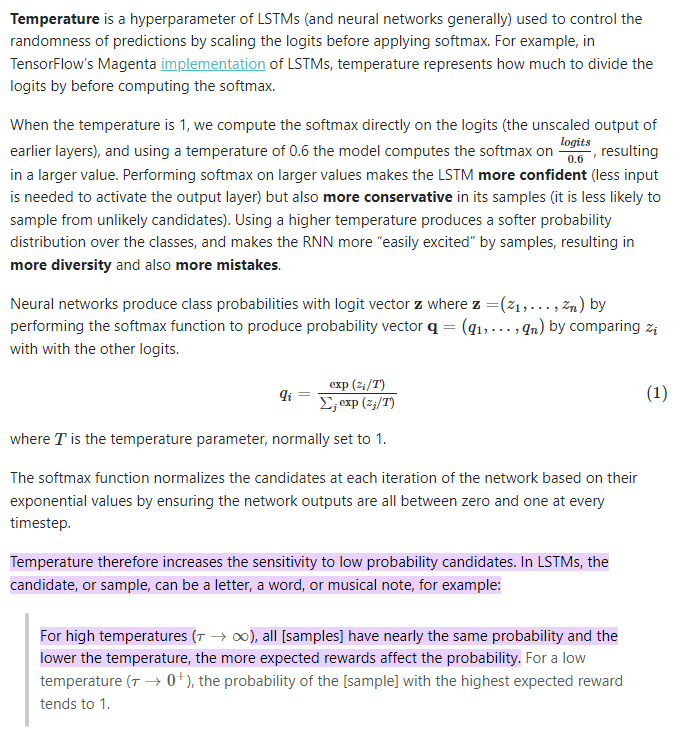

### The below generates sequences based on the top probabilities of all notes - no procedural rules associated

In [ ]:
pitchTemperature = 1.0
durationTemperature = 1.0
offsetTemperature = 1.0
eventsToPredict = 500

def logitsFrom(probabilities, temperature):
    return [(math.log(x) / temperature) for x in probabilities]

def softmax(logits):
    bottom = sum([math.exp(x) for x in logits])
    softmax = [math.exp(x)/bottom for x in logits]
    return softmax

# pick a random sequence from the input as a starting point for the prediction
start = np.random.randint(0, len(network_inputs[0])-1)

print(start)
print(network_inputs[0].shape)

index_to_note = dict((number, note) for number, note in enumerate(pitchnames[0]))
index_to_duration = dict((number, duration) for number, duration in enumerate(durationnames[0]))
index_to_offset = dict((number, offset) for number, offset in enumerate(offsetnames[0]))

pattern = network_inputs[0][start]
prediction_output = collections.defaultdict(list)

# generate 500 notes
for note_index in range(eventsToPredict):
    prediction_input = np.expand_dims(pattern, axis = 0)

    prediction = models[0].predict(prediction_input, verbose=0)
            
    pitch_predictions = np.squeeze(prediction['pitch'])
    duration_predictions = np.squeeze(prediction['duration'])
    offset_predictions = np.squeeze(prediction['offset'])
    
    pitch_logits = np.array([logitsFrom(pitch_predictions, pitchTemperature)])
    duration_logits = np.array([logitsFrom(duration_predictions, durationTemperature)])
    offset_logits = np.array([logitsFrom(offset_predictions, offsetTemperature)])
    
    #sample pitch
    pitch_selection = tf.random.categorical(pitch_logits, num_samples=1)
    
    #sample duration
    duration_selection = tf.random.categorical(duration_logits, num_samples=1)
    
    #sample offset
    offset_selection = tf.random.categorical(offset_logits, num_samples=1)
    
    pitch_index = int(np.squeeze(pitch_selection))
    duration_index = int(np.squeeze(duration_selection))
    offset_index = int(np.squeeze(offset_selection))
    
    predicted_pitch = index_to_note[pitch_index]
    predicted_duration = index_to_duration[duration_index]
    predicted_offset = index_to_offset[offset_index]
        
    print("Predicted pitch: " + predicted_pitch)
    print("Predicted duration: " + predicted_duration)
    print("Predicted offset: " + predicted_offset + "\n")
    
    #append actual pitches/durations to prediction_output
    prediction_output['pitch'].append(predicted_pitch)
    prediction_output['duration'].append(predicted_duration)
    prediction_output['offset'].append(predicted_offset)

    #need to append processed pitch to pattern
    pattern = np.append(pattern, [[pitch_index / float(n_vocab_pitch[0]), duration_index / float(n_vocab_duration[0]), offset_index / float(n_vocab_offset[0])]], 0)
    
    pattern = pattern[1:len(pattern)]
    
print(str(eventsToPredict) + " events predicted")

In [ ]:
""" convert the output from the prediction to notes and create a midi file
        from the notes """
pattern_offset = 0
output_notes = []

# create note and chord objects based on the values generated by the model
for i in range(len(prediction_output['pitch'])):
    
    pattern_pitch = prediction_output['pitch'][i]
    pattern_duration = float(Fraction(prediction_output['duration'][i]))
    pattern_offset = float(Fraction(pattern_offset) + Fraction(prediction_output['offset'][i]))
    
    # pattern is a chord
    if ('.' in pattern_pitch) or pattern_pitch.isdigit():
        notes_in_chord = pattern_pitch.split('.')
        notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(int(current_note), quarterLength=pattern_duration)
            new_note.storedInstrument = instrument.Piano()
            notes.append(new_note)
        new_chord = chord.Chord(notes)
        new_chord.offset = pattern_offset
        output_notes.append(new_chord)
    # pattern is a note
    elif(pattern_pitch == 'rest'):
        new_note = note.Rest(quarterLength=pattern_duration)
        new_note.offset = pattern_offset
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)
    else:
        new_note = note.Note(pattern_pitch, quarterLength=pattern_duration)
        new_note.offset = pattern_offset
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)

for i in range(1, len(prediction_output['pitch']), 1):
    if(((output_notes[i - 1].offset + output_notes[i - 1].pattern_duration) % 4.0) != output_notes.offset):
        print("offset not equal")
        print(((output_notes[i - 1].offset + output_notes[i - 1].pattern_duration) % 4.0))
        print("does not equal:")
        print(output_notes.offset)
        print("\n")

midi_stream = stream.Stream(output_notes)

midi_stream.write('midi', fp=export_midi_path)

## More sophisticated song generation below

In [ ]:
# Base section class
class Section:
    def __init__(self, model_num, section_length, repeat_length, pitch_temperature = 1.0, duration_temperature = 1.0, offset_temperature = 1.0):
        assert (section_length % repeat_length == 0), "section_length must be a multiple of repeat_length"
        self.model_num = model_num
        self.section_length = section_length
        self.repeat_length = repeat_length
        self.pitch_temperature = pitch_temperature
        self.duration_temperature = duration_temperature
        self.offset_temperature = offset_temperature
        
    def logitsFrom(self, probabilities, temperature):
        return [(math.log(x) / temperature) for x in probabilities]

    def softmax(self, logits):
        bottom = sum([math.exp(x) for x in logits])
        softmax = [math.exp(x)/bottom for x in logits]
        return softmax
    
    def generate(self):
        return []

In [ ]:
# The DjustDjent section produces only notes on the lowest 5 notes of the dataset
class DjustDjent(Section):
    
    #will generate a djent pattern with the lowest numNotes amount of notes
    def __init__(self, model_num, numNotes, section_length, repeat_length, bpm, pitch_temperature = 1.0, duration_temperature = 2.0, offset_temperature = 2.0):
        assert (section_length % repeat_length == 0), "section_length must be a multiple of repeat_length"
        self.model_num = model_num
        self.section_length = section_length
        self.repeat_length = repeat_length
        self.pitch_temperature = pitch_temperature
        self.duration_temperature = duration_temperature
        self.offset_temperature = offset_temperature
        self.numNotes = numNotes
        self.bpm = bpm
    
    def generate(self):
        
        drum_file = glob.glob("./Djent Metal Sam Applebaum MIDI Pack/" + str(song_bpm) + "/*.mid")[np.random.randint(0, len(glob.glob("./Djent Metal Sam Applebaum MIDI Pack/" + str(song_bpm) + "/*.mid"))-1)]
        midi_drums = converter.parse(drum_file)
        assert (len(midi_drums.parts) == 1), "The selected drum file has more than 1 part"
        
        # pick a random sequence from the input as a starting point for the prediction
        start = np.random.randint(0, len(network_inputs[self.model_num])-1)
        
        #create index to note dictionaries
        index_to_note = dict((number, note) for number, note in enumerate(pitchnames[self.model_num]))
        index_to_duration = dict((number, duration) for number, duration in enumerate(durationnames[self.model_num]))
        index_to_offset = dict((number, offset) for number, offset in enumerate(offsetnames[self.model_num]))

        pattern = network_inputs[self.model_num][start]
        prediction_output = collections.defaultdict(list)
        
        current_position = 0
        min_next_offset = 0
        
        while(current_position < (self.repeat_length * 4)):
            prediction_input = np.expand_dims(pattern, axis = 0)

            prediction = models[self.model_num].predict(prediction_input, verbose=0)

            pitch_predictions = np.squeeze(prediction['pitch'])
            duration_predictions = np.squeeze(prediction['duration'])
            offset_predictions = np.squeeze(prediction['offset'])
            
            # stack pitch predictions with pitch names
            pitches = np.stack((pitch_predictions, pitchnames[0]), axis=1)
            # stack duration predictions with duration names
            durations = np.stack((duration_predictions, durationnames[0]), axis=1)
            # stack offset predictions with offset names
            offsets = np.stack((offset_predictions, offsetnames[0]), axis=1)

            # Remove anything that's not a note
            tmp_pitches = []
            for pitch in pitches:
                if(pitch[1] != 'rest' and not ('.' in pitch[1])):
                    tmp_pitches.append(pitch)

            pitches = copy.deepcopy(np.array(tmp_pitches))

            # Get probabilities of lowest 5 notes from dataset
            pitches = np.array(sorted(pitches, key = lambda x: (ord(x[1][0]) * int(x[1][-1])) + int(x[1][1] == '#'))[0:self.numNotes])
            
            #if only one pitch - add the same value again so that you can still feed it into the logits function but no matter what you'll only get the one pitch
            #this is just a patch for now - make a more elegant solution later
            if(len(pitches) == 1):
                pitches = np.append(pitches, pitches, 0)
            
            
            # logits this now
            pitch_predictions = np.squeeze([float(pitch[0]) for pitch in pitches])            
            
            pitch_logits = np.array(self.logitsFrom(pitch_predictions, self.pitch_temperature))
            duration_logits = np.array(self.logitsFrom(duration_predictions, self.duration_temperature))
            offset_logits = np.array(self.logitsFrom(offset_predictions, self.offset_temperature))
            
            pitch_logits_softmax = np.array([self.softmax(pitch_logits)])
            duration_logits_softmax = np.array([self.softmax(duration_logits)])
            offset_logits_softmax = np.array([self.softmax(offset_logits)])
            
            #sample pitch
            pitch_selection = tf.random.categorical(pitch_logits_softmax, num_samples=1)

            #sample duration
            duration_selection = tf.random.categorical(duration_logits_softmax, num_samples=1)

            #sample offset
            offset_selection = tf.random.categorical(offset_logits_softmax, num_samples=1)
            
            pitch_index = int(np.squeeze(pitch_selection))
            duration_index = int(np.squeeze(duration_selection))
            offset_index = int(np.squeeze(offset_selection))

            predicted_pitch = pitches[pitch_index][1]
            predicted_duration = index_to_duration[duration_index]
            predicted_offset = index_to_offset[offset_index]
            
            #always want to start on an exact quarter note
            if(len(prediction_output['offset']) == 0):
                predicted_offset = str(math.floor(float(Fraction(predicted_offset))))  
                
                # pad front of measure with rest if notes don't start right at offset 0
                if(float(Fraction(predicted_offset)) != 0):
                    prediction_output['pitch'].append('rest')
                    prediction_output['duration'].append(predicted_offset)
                    prediction_output['offset'].append(str(0))
            else:
                predicted_offset = str(max(float(Fraction(predicted_offset)), min_next_offset))
                
                # round to nearest 16th note
                predicted_offset = (float(Fraction(predicted_offset)) / 0.25) * 0.25
                
                if(float(Fraction(predicted_offset)) > min_next_offset):
                    prediction_output['pitch'].append('rest')
                    prediction_output['duration'].append(float(Fraction(predicted_offset)) - min_next_offset)
                    prediction_output['offset'].append(min_next_offset)
    
                
            new_position = current_position + (float(Fraction(predicted_offset)) - min_next_offset)
                
            if((new_position + float(Fraction(predicted_duration))) > (self.repeat_length * 4)):
                predicted_duration = str((self.repeat_length * 4) - new_position)
            
            if(float(Fraction(predicted_duration)) < 0):
                prediction_output['pitch'][-1] = 'rest'
                prediction_output['duration'][-1] = (self.repeat_length * 4) - current_position
                prediction_output['offset'][-1] = min_next_offset
                break;
            
            #append actual pitches/durations to prediction_output
            prediction_output['pitch'].append(predicted_pitch)
            prediction_output['duration'].append(predicted_duration)
            prediction_output['offset'].append(predicted_offset)

            #need to append processed pitch to pattern
            pattern = np.append(pattern, [[pitchnames[self.model_num].index(predicted_pitch) / float(n_vocab_pitch[self.model_num]), duration_index / float(n_vocab_duration[self.model_num]), offset_index / float(n_vocab_offset[self.model_num])]], 0)
            pattern = pattern[1:len(pattern)]
            
            current_position = new_position + float(Fraction(predicted_duration))
            min_next_offset = float(Fraction(predicted_duration))
            
        
        
        """ convert the output from the prediction to notes and create a midi file
        from the notes """
        pattern_offset = 0
        output_guitar_notes = []
        # create note and chord objects based on the values generated by the model
        for i in range(len(prediction_output['pitch'])):

            pattern_pitch = prediction_output['pitch'][i]
            pattern_duration = float(Fraction(prediction_output['duration'][i]))    
            pattern_offset = float(Fraction(pattern_offset) + Fraction(prediction_output['offset'][i]))
            
            # pattern is a chord
            if ('.' in pattern_pitch) or pattern_pitch.isdigit():
                notes_in_chord = pattern_pitch.split('.')
                notes = []
                for current_note in notes_in_chord:
                    new_note = note.Note(int(current_note), quarterLength=pattern_duration)
                    new_note.storedInstrument = instrument.Piano()
                    notes.append(new_note)
                new_chord = chord.Chord(notes)
                new_chord.offset = pattern_offset
                output_guitar_notes.append(new_chord)
            # pattern is a note
            elif(pattern_pitch == 'rest'):
                new_note = note.Rest(quarterLength=pattern_duration)
                new_note.offset = pattern_offset
                new_note.storedInstrument = instrument.Piano()
                output_guitar_notes.append(new_note)
            else:
                new_guitar_note = note.Note(pattern_pitch, quarterLength=pattern_duration)
                new_guitar_note.offset = pattern_offset
                new_guitar_note.storedInstrument = instrument.Piano()
                output_guitar_notes.append(new_guitar_note)
                

        guitarPart = stream.Part()
        for i in range(int(self.section_length / self.repeat_length)):
            ts = meter.TimeSignature('4/4')
            m = stream.Measure(number=i)
            m.offset = i * (self.repeat_length * 4)
            m.insert(0, ts)
            m.append(output_guitar_notes)
            guitarPart.append(copy.deepcopy(m))
            
            
        output_drum_notes = []
        for element in midi_drums.flatten():
            if(float(Fraction(element.duration.quarterLength)) +float(Fraction(element.offset)) < float(Fraction(guitarPart.duration.quarterLength))):
                output_drum_notes.append(element)
            
        drumPart = stream.Part()
        drumPart.append(output_drum_notes)
            
        # add kicks to drumPart
        for element in guitarPart.flatten():
            if isinstance(element, note.Note):
                drumPart.insert(element.offset, note.Note(midi=36, quarterLength=element.duration.quarterLength))
                
              
            
        return guitarPart, drumPart

### Song Generator:

In [ ]:
# these correspond to the BPMs in the GGD Djent Metal Sam Applebaum MIDI Pack
song_bpms = [
    150,
    150
]

song_bpm = song_bpms[np.random.randint(0, len(song_bpms)-1)]
print("BPM: " + str(song_bpm))

song_sections = [
    DjustDjent(0, 1, 8, 4, song_bpm)
]
    
midi_guitar_stream = stream.Score()
midi_drum_stream = stream.Score()

for section in song_sections:
    guitarPart, drumPart = section.generate()
    midi_drum_stream.append(drumPart)
    for part in guitarPart:
        midi_guitar_stream.append(part)
    
midi_guitar_stream.write('midi', fp=export_midi_path + ".mid")
midi_drum_stream.write('midi', fp=export_midi_path + "_drums.mid")